# [Программирование на Python (SCS)](https://compscicenter.ru/courses/python/2015-autumn/classes/)
## Лектор Сергей Лебедев


|     **Дата**     |   **Название**  |   **Материалы**   |
|:----------------:|:---------------:|:-----------------:|
| ?? сентября 2015      |    Строки, байты, файлы и ввод-вывод | [Слайды (PDF)](/) \ [Видео](/)|

# 4. Строки, байты, файлы и ввод-вывод

• Для объявления строки можно использовать двойные или
одинарные кавычки:

In [1]:
"foobar" == 'foobar'

True

In [2]:
'"Where art thou?"'

'"Where art thou?"'

In [3]:
"I'm here!"

"I'm here!"

In [4]:
# • Для многострочных блоков текста используют тройные
# кавычки:
"""foo
    bar"""

'foo\n    bar'

In [5]:
'''foo
    bar'''

'foo\n    bar'

In [7]:
# Подряд идущие строковые литералы “склеиваются”:
"foo" "bar"

'foobar'

# Слайд 2. Экранированные последовательности и "сырые" строки
• Строковые литералы могут содержать экранированные
последовательности, например (Полный список поддерживаемых последовательностей можно прочитать в документации http://bit.ly/escape-sequences)
```
\' одинарная кавычка,
\" двойная кавычка,
\t символ вертикальной табуляции,
\n символ переноса строки,
\xhh символ с HEX кодом hh.
```
• В “сырых” строковых литералах экранированные
последовательности не обрабатываются.

In [9]:
print("\tell me")
print(r"\tell me")

	ell me
\tell me


# Слайд 3. ASCII
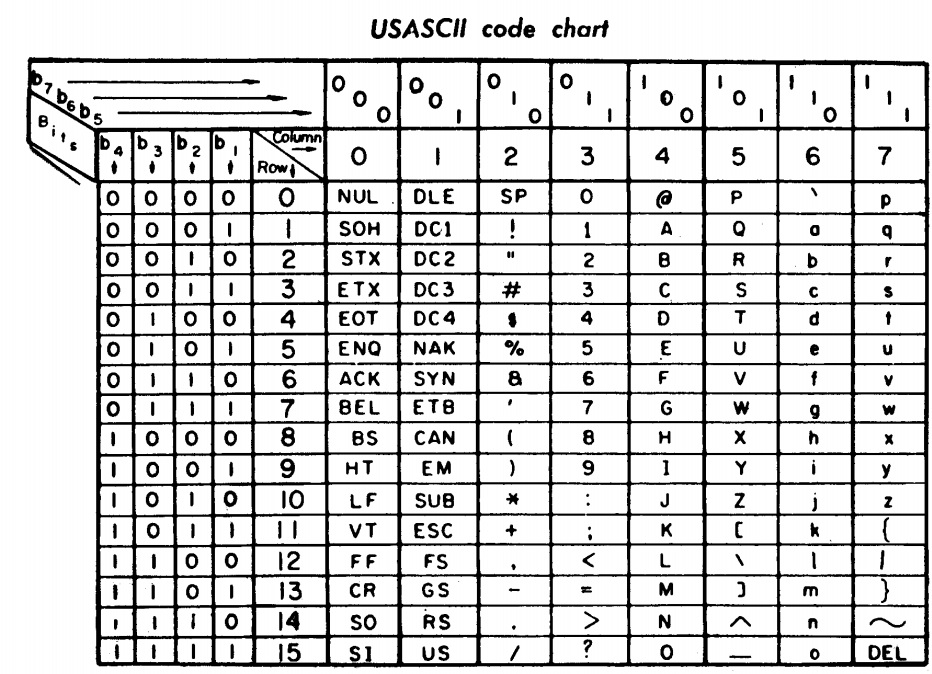

• Юникод — стандарт кодирования текста на разных языках.<br>
• В стандарте версии 8.0 содержится более 120 000
символов.<br>
• Фактически Юникод — это отображение, сопоставляющее
символу (`codepoint`) уникальный номер.<br>
• Как закодировать всё это множество символов байтами?<br>
- Unicode Transformation Format, по N бит на каждый символ: <br>
UTF-8, UTF-16, UTF-32.<br>
- Universal Character Set, по N байт на каждый символ: UCS-2, UCS-4.<br>

• Если кодировка использует более одного байта, то
закодированный текст может также содержать BOM —
маркер последовательности байтов, U+FEFF.

# unicode в Python3
• Тип **str** — неизменяемая последовательность символов Юникод:

In [11]:
s = "я строка"
list(s)

['я', ' ', 'с', 'т', 'р', 'о', 'к', 'а']

In [12]:
# • Отдельного типа для символов в Python нет: каждый
# символ строки — тоже строка:
s[0], type(s[0])

('я', str)

• Как строки представляются в памяти?
UTF-8 UTF-16 UTF-32 UCS-2 UCS-4
# Слайд 6. Внутреннее представление строк
• Начиная с версии 3.3 в Python был реализован PEP-3934,
который описывает механизм адаптивного представления
строк.

• Если строка состоит из символов ASCII, то она хранится в
кодировке UCS-1, то есть каждый символ представляется
одним байтом.

• Если максимальный код символа в строке меньше 216, то
используется UCS-2.

• Иначе используется UCS-4, кодирующая каждый символ
четырьмя байтами.

• Несколько примеров:

In [13]:
# ord - Return the Unicode code point for a one-character string
list(map(ord, "hello"))   # UCS-1

[104, 101, 108, 108, 111]

In [15]:
list(map(ord, "привет")) # UCS-2

[1087, 1088, 1080, 1074, 1077, 1090]

In [20]:
ord("💩")  # UCS-4, почти

128169

Python поддерживает экранированные
последовательности для символов Юникода:

In [21]:
"\u0068", "\U00000068"

('h', 'h')

In [24]:
"\N{DOMINO TILE HORIZONTAL-01-05}"

'🀽'

In [ ]:
Получить символ Юникода по его коду можно с помощью
функции chr:

In [26]:
print(chr(0x68), chr(1087), chr(128169))

h п 💩


In [27]:
def identity(ch):
     return chr(ord(ch))
identity("п")

'п'

# Слайд 8. Методы работы со строками: модификаторы регистра


In [30]:
print("foo bar".capitalize())
print("foo bar".title())
print("foo bar".upper())
print("foo bar".lower())
print("foo bar".title().swapcase())

Foo bar
Foo Bar
FOO BAR
foo bar
fOO bAR


# Слайд 9. Выравнивание
• Группа методов, выравнивающих строку в “блоке”
фиксированной длины. При этом дополнительные позиции
заполняются указанным символом:

In [1]:
print("foo bar".ljust(16, '~'))
print("foo bar".rjust(16, '~'))
print("foo bar".center(16, '~'))
print("foo bar".ljust(16))
print("foo bar".rjust(16))
print("foo bar".center(16))

foo bar~~~~~~~~~
~~~~~~~~~foo bar
~~~~foo bar~~~~~
foo bar         
         foo bar
    foo bar     


# Слайд 10. Удаление символов

• Группа методов, заканчивающихся на strip, удаляет все
вхождения указанных символов слева, справа или с обоих
концов строки:

In [3]:
print("]>>foo bar<<[".lstrip("]>"))
print("]>>foo bar<<[".rstrip("[<"))
print("]>>foo bar<<[".strip("[]<>"))
# По умолчанию удаляются все пробелы:
print("\t foo bar \r\n ".strip())

foo bar<<[
]>>foo bar
foo bar
foo bar


# Слайд 11. Разделение

• Метод split разделяет строку на подстроки по указанному
разделителю:

In [4]:
print("foo,bar".split(","))
print("foo,,,bar".split(","))

# Если разделитель не указан, то строка разделяется по пробелам.
print("\t foo bar \r\n ".split())

#  Метод partition возвращает кортеж из трёх элементов:
# подстрока до вхождения разделителя, сам разделитель и
# подстрока после вхождения разделителя.
print("foo,bar,baz".partition(","))
print("foo,bar,baz".rpartition(","))

['foo', 'bar']
['foo', '', '', 'bar']
['foo', 'bar']
('foo', ',', 'bar,baz')
('foo,bar', ',', 'baz')


# Слайд 12. Соединение

С помощью метода join можно соединить любую
последовательность строк:

In [5]:
print(", ".join(["foo", "bar", "baz"]))
print(", ".join(filter(None, ["", "foo"])))
print(", ".join("bar"))
# Если последовательность содержит объекты другого типа, будет ошибка:
print(", ".join(range(10)))

foo, bar, baz
foo
b, a, r


TypeError: sequence item 0: expected str instance, int found

# Слайд 13. Проверка на вхождение
Вхождение подстроки идиоматично проверять с помощью операторов in и not in:

In [8]:
print("foo" in "foobar")
print("yada" not in "foobar")

# Также можно сравнивать префикс или суффикс строки с
# одной или несколькими строками:
print("foobar".startswith("foo"))
print("foobar".endswith(("boo", "bar")))


True
True
True
True


# Слайд 14. Поиск подстроки
• Найти место первого вхождения подстроки можно с
помощью метода find:

In [12]:
print("abracadabra".find("ra"))
print("abracadabra".find("ra", 0, 3))
# Метод index аналогичен find, но, если искомая подстрока не найдена, он поднимает исключение:
print("abracadabra".index("ra", 0, 4))

2
-1
2


Для поиска места последнего вхождения подстроки можно
воспользоваться методами rfind и rindex.

# Слайд 15. Замена подстроки

Метод replace заменяет вхождения подстроки на
заданную строку, по умолчанию — все:


In [19]:
print("abracadabra".replace("ra", "**"))

# можно указать сколько делать замен:
print("abracadabra".replace("ra", "**", ))

# Для множественной замены символов удобно использовать метод translate, который принимает
# словарь трансляции
translation_map = {ord("a"): "*", ord("b"): "?"}
print("abracadabra".translate(translation_map))

ab**cadab**
ab**cadab**
*?r*c*d*?r*


# Слайд 16. Предикаты

Методы-предикаты позволяют проверить строку на
соответствие некоторому формату, например:

In [20]:
print("100500".isdigit())
print("foo100500".isalnum())
print("foobar".isalpha())
print("foobar".islower())
print("FOOBAR".isupper())
print("Foo Bar".istitle())
print("\r \n\t \r\n".isspace())


True
True
True
True
True
True
True


# Слайд 17. Форматирование строк: format
В Python есть два способа форматирования строк. Первый,
который мы рассмотрим, использует метод **format**:

In [27]:
print("{}, {}, how are you?".format("Hello", "Sally"))
print("Today is October, {}th.".format(8))


Hello, Sally, how are you?
Today is October, 8th.


В Python 3 есть три различных по смыслу способа
преобразовать объект в строку:
- `str` возвращает человекочитаемое представление объекта,
- `repr` возвращает представление объекта, по которому
можно однозначно восстановить его значение,
- `ascii` аналогичен repr по смыслу, но возвращаемая строка
состоит только из символов ASCII.

Примеры:

In [30]:
print(str("я строка"))
print(repr("я строка"))
print(ascii("я строка"))
print(ascii("I'm a string"))

я строка
'я строка'
'\u044f \u0441\u0442\u0440\u043e\u043a\u0430'
"I'm a string"


# Слайд 19. Форматирование строк: {}
- Напоминание: внутри {} можно опционально указать
способ преобразования объекта в строку и спецификацию
формата.
- Для преобразования объекта в строку используются
первые буквы соответствующих функций:

In [32]:
print("{!s}".format("я строка"))  # str
print("{!r}".format("я строка"))  # repr
print("{!a}".format("я строка"))  # ascii
print("{!a}".format("I'm a string"))  # ascii

я строка
'я строка'
'\u044f \u0441\u0442\u0440\u043e\u043a\u0430'
"I'm a string"


# Слайд 20. Спецификация формата
Спецификация формата позволяет:

In [41]:
# выровнять строку в “блоке” фиксированной длины,
print("{:~^16}".format("foo bar"))

# привести число к другой системе счисления,
print("int: {0:d} hex: {0:x}".format(42))
print("oct: {0:o} bin: {0:b}".format(42))

# потребовать наличие знака в строковом представлении числа и зафиксировать 
# количество знаков до или после запятой.
print("{:+07.2f}".format(-42.42))

# Комбинированный пример:
print("{!r:~^16}".format("foo bar"))

~~~~foo bar~~~~~
int: 42 hex: 2a
oct: 52 bin: 101010
-042.42
~~~'foo bar'~~~~


# Слайд 21. Форматирование: позиционные и ключ. арг.
Внутри {} можно также явно указывать номер
позиционного или имя ключевого аргумента:

In [42]:
print("{0}, {1}, {0}".format("hello", "kitty"))
print("{0}, {who}, {0}".format("hello", who="kitty"))

# Если один из аргументов — контейнер, то при форматировании можно 
# обращаться к его элементам по индексу или ключу:
point = 0, 10
print("x = {0[0]}, y = {0[1]}".format(point))
point = {"x": 0, "y": 10}
print("x = {0[x]}, y = {0[y]}".format(point))


hello, kitty, hello
hello, kitty, hello
x = 0, y = 10
x = 0, y = 10


# Слайд 22. Форматирование: олдскул
- пропустил. Даёшь молодежь!

# Слайд 23. Форматирование: резюме:
В Python есть два механизма форматирования строк:
- с использованием метода format и
- с помощью оператора %.
- Метод format объективно более лучше, поэтому
рекомендуется использовать его.

# Слайд 24. Модуль string

В модуле string можно найти полезные при работе со
строками константы:

In [55]:
import string 

print(string.ascii_letters)
print(string.digits)
print(string.punctuation)
print("{!r}".format(string.whitespace))
print(string.whitespace)

abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ
0123456789
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
' \t\n\r\x0b\x0c'
 	



# Слайд 25: Строки: резюме
- Строки в Python 3 — это последовательности символов
(правильнее codepoints) Юникод.
- В отличие от C/C++ или Java:
- нет разницы между одинарными и двойными кавычками,
- символ строки — это тоже строка,
- можно использовать тройные кавычки для многострочных
блоков текста.
- Обилие методов у класса `str` позволяет не изобретать
велосипед при работе с текстовыми данными.
- Для форматирования строк следует использовать метод
`format`, но полезно знать также про синтаксис с
использованием оператора `%` (врядли).

# Слайд 26. БАЙТЫ
Тип bytes — неизменяемая последовательность байтов.
- Аналогично строковым литералам в Python есть литералы
для байтов и “сырых” байтов:

In [56]:
print(b"\00\42\24\00")   # байты
print(rb"\00\42\24\00")  # "сырые" байты

# Байты и строки тесно связаны:
# - строку можно закодировать последовательностью байтов
chunk = "я строка".encode("utf-8")
print(chunk)
# - и из последовательности байтов можно раскодировать строку
print(chunk.decode("utf-8"))  #  utf-8 - одна из кодировок Юникода.


b'\x00"\x14\x00'
b'\\00\\42\\24\\00'
b'\xd1\x8f \xd1\x81\xd1\x82\xd1\x80\xd0\xbe\xd0\xba\xd0\xb0'
я строка


# Слайд 27. Байты, строки и кодировки
Кодировка специфицирует преобразование текстовой
строки в последовательность байтов. Стандартная
библиотека Python поддерживает более сотни кодировок.
- Любители Windows наверняка узнают магическое
сочетание букв в следующем примере:

In [58]:
chunk = "я строка".encode("cp1251")
print(chunk)

b'\xff \xf1\xf2\xf0\xee\xea\xe0'


In [59]:
# Что будет, если указать неверную кодировку? - ошибка!
chunk.decode("utf-8")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte

# Слайд 28. Кодировки и ошибки
- Методы *encode* и __decode__ принимают опциональный
аргумент, контролирующий логику обработки ошибок:
> - "strict" — ошибочные символы поднимают исключение, 
> - "ignore" — ошибочные символы пропускаются,
> - "replace" — ошибочные символы заменяются на "\ufffd".

Пример:

In [62]:
chunk = "я строка".encode("cp1251")
print(chunk.decode("utf-8", "ignore"))
chunk.decode("utf-8", "replace")

'� ������'

Если не указывать кодировку, то Python будет
использовать системную кодировку по умолчанию:

In [64]:
import sys
sys.getdefaultencoding()

'utf-8'

# Слайд 30. Байты резюме
- Байты в Python 3 — это специальный тип для
последовательности байтов.
- Байты — это не строки, а строки — это не байты, но:
>- строку можно кодировать байтами,
>- а байты можно декодировать в строку.
- Большинство операций, поддерживаемых строками,
реализованы и для байтов:

In [65]:
b"foo bar".title().center(16, b"~")

b'~~~~Foo Bar~~~~~'

# Слайд 31. Файлы и ввод-вывод: open

Текстовые и бинарные файлы в Python — это две большие разницы.
Создать объект типа `файл` можно с помощью функции **open**, которая принимает один обязательный аргумент — путь к файлу:

In [68]:
open("./HBA1.txt")

<_io.TextIOWrapper name='./HBA1.txt' mode='r' encoding='cp1251'>

Аргументов у функции **open** довольно много, нас будут интересовать:
- mode — определяет, в каком режиме будет открыт файл,
возможные значения:
> "r", "w", "x", "a", "+",<br>
> "b", "t".
- для текстовых файлов можно также указать `encoding` и
`errors`.

In [75]:
# Открыть бинарный файл для чтения и записи:
print(open("./csc.db", "r+b"))

# Открыть текстовый в файл в кодировке "cp1251" для
# добавления, игнорируя ошибки кодирования:
print(open("./admin.log", "a", encoding="cp1251", errors="ignore"))

# Создать новый текстовый файл в системной кодировке и
# открыть его для записи:
print(open("./lecture4.tex", "x"))

<_io.BufferedRandom name='./csc.db'>
<_io.TextIOWrapper name='./admin.log' mode='a' encoding='cp1251'>
<_io.TextIOWrapper name='./lecture4.tex' mode='x' encoding='cp1251'>


# Слайд 33. Методы работы с файлами: чтение